<a href="https://colab.research.google.com/github/DHANISH-UI/rag/blob/main/Copy_of_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip install -qU langchain-openai
!pip install -qU langchain_huggingface
!pip install -qU langchain-chroma
!pip install langchain-community langchain-core
!pip install sentence-transformers
!pip install -qU pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.4/441.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.7/367.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Get

# Loading documents


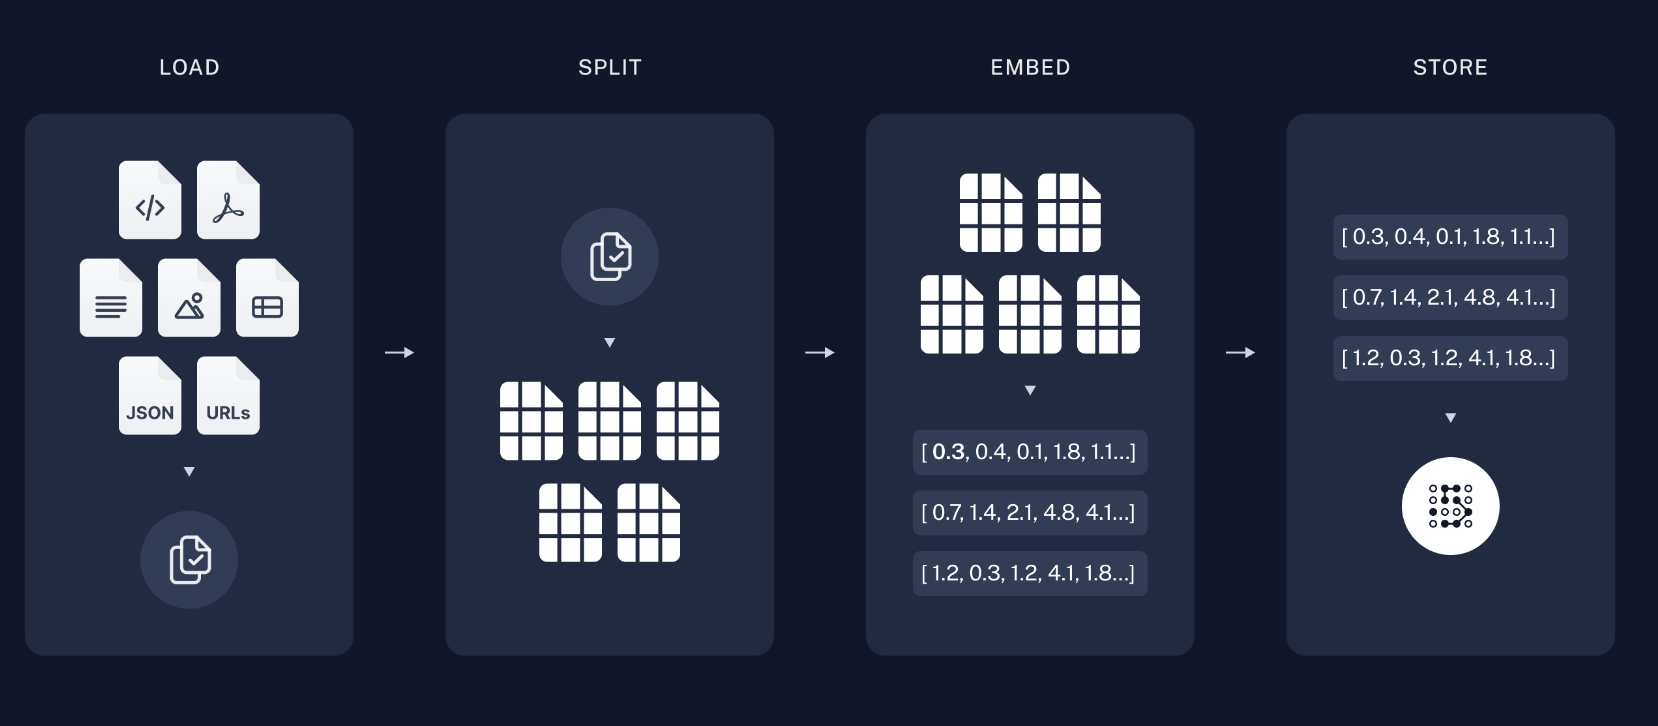

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("RIL-Integrated-Annual-Report-2023-24 (1).pdf")
pages = []
for page in loader.load():
  pages.append(page)

In [ ]:
len(pages)

159

In [ ]:
print(pages[99].page_content)

The Company has a prudent and conservative process for managing its credit risk arising in the course of its business activities. 
Credit risk is actively managed through Letters of Credit, Bank Guarantees, Parent company Guarantees, advance payments 
and factoring & forfaiting without recourse to the Company to avoid concentration of risk. The Company restricts its fixed 
income investments to liquid securities carrying high credit rating.
 iv) Liquidity Risk
   Liquidity risk arises from the Company’s inability to meet its cash flow commitments on the due date. The Company maintains 
sufficient stock of cash, marketable securities and committed credit facilities. The Company accesses global and local financial 
markets to meet its liquidity requirements. It uses a range of products and a mix of currencies to ensure efficient funding from 
across well-diversified markets and investor pools. Treasury monitors rolling forecasts of the Company’s cash flow position and 
ensures that the C

# Text Splitting

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 3000,
    chunk_overlap  = 100,
    add_start_index = True
)
all_splits = text_splitter.split_documents(pages)
print(f"Split pages into {len(all_splits)} sub-documents.")

Split pages into 437 sub-documents.


In [ ]:
all_splits

[Document(metadata={'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 19.5 (Windows)', 'creationdate': '2024-08-07T11:55:42+05:30', 'moddate': '2024-08-07T11:59:55+05:30', 'trapped': '/False', 'source': 'RIL-Integrated-Annual-Report-2023-24 (1).pdf', 'total_pages': 159, 'page': 0, 'page_label': '1', 'start_index': 0}, page_content='Reliance for\nENTERTAINMENT\nDIGITAL SERVICES\n SPORTS\nRETAIL\nEDUCATION\nEMPOWERMENTMATERIALS\n ENERGY\nIntegrated Annual Report 2023-24'),
 Document(metadata={'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 19.5 (Windows)', 'creationdate': '2024-08-07T11:55:42+05:30', 'moddate': '2024-08-07T11:59:55+05:30', 'trapped': '/False', 'source': 'RIL-Integrated-Annual-Report-2023-24 (1).pdf', 'total_pages': 159, 'page': 1, 'page_label': '2', 'start_index': 0}, page_content='Our dreams have to be bigger.  \nOur ambitions higher.  \nOur commitment deeper.  \nAnd our efforts greater.  \nThis is my dream for Reliance  \nand for India.\

# Store as embeddings

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name ="sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain_chroma import Chroma
vector_store = Chroma(embedding_function=embeddings)

In [ ]:
document_ids = vector_store.add_documents(documents=all_splits)

# Query

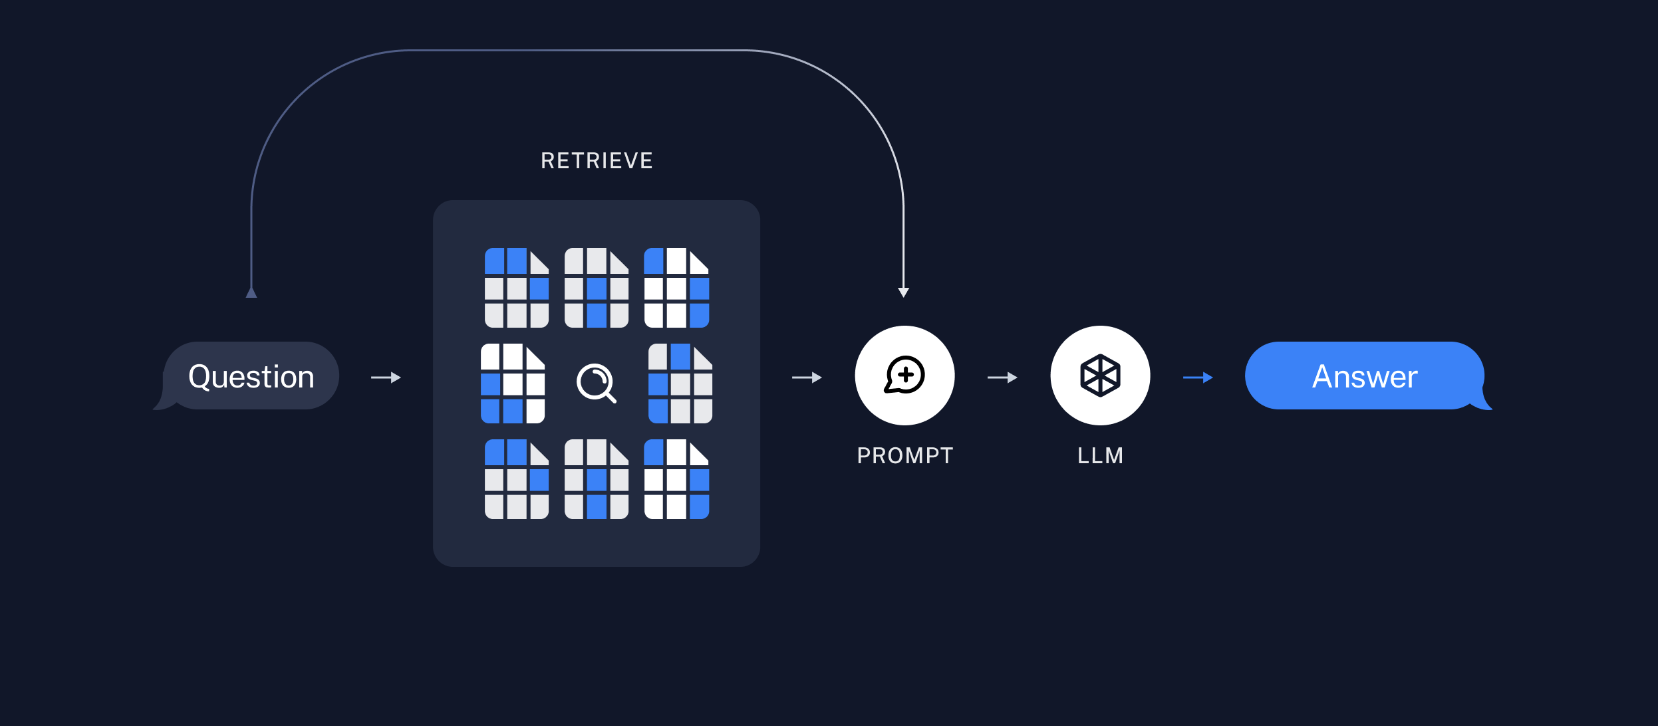

In [ ]:
query = "what can we infer from the balance sheet as on 31st march 2024?"

# Convert as embedding and find similar chunks

In [ ]:
retrieved_docs = vector_store.similarity_search(query,k=3)

In [ ]:
len(retrieved_docs)

3

In [ ]:
retrieved_docs

[Document(id='c923fe56-a91c-440f-86d1-84782b4e9d56', metadata={'creationdate': '2024-08-07T11:55:42+05:30', 'source': 'RIL-Integrated-Annual-Report-2023-24 (1).pdf', 'moddate': '2024-08-07T11:59:55+05:30', 'total_pages': 159, 'trapped': '/False', 'start_index': 0, 'page': 66, 'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 19.5 (Windows)', 'page_label': '67'}, page_content='Balance Sheet\nAs at 31st March, 2024\n(C in crore)\nNotes As at\n31st March, 2024\nAs at\n31st March, 2023\nAssets\nNon-Current Assets\nProperty, Plant and Equipment 1  2,58,911 2,52,967\nIntangible Assets 1  40,719 29,334\nCapital Work-in-Progress 1  44,294 30,972\nIntangible Assets Under Development 1  17,338 23,385\nFinancial Assets\nInvestments 2  3,01,400 2,65,067\nLoans 3  10,051 12,431\nOther Financial Assets 4  16,902 2,215\nOther Non-Current Assets 5  7,403 2,832\nTotal Non-Current Assets 6,97,018 6,19,203\nCurrent Assets\nInventories 6  85,100 84,756\nFinancial Assets\nInvestments 7  68,6

# Prompt Template

In [ ]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
prompt[0]

HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})

In [ ]:
docs_content = "\n\n".join(doc.page_content for doc in retrieved_docs)
messages = prompt.invoke({"context": docs_content, "question": query})

#Pass to LLM

In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

from langchain_openai import OpenAI
llm = OpenAI(model="gpt-4o-mini")

··········


In [ ]:
response = llm.invoke(messages)

# Get Answer

In [ ]:
print(response)

 As of 31st March 2024, the total assets have increased to ₹9,59,643 crore from ₹9,22,660 crore in the previous year, indicating growth in the company's resources. Non-current assets have also increased significantly, driven by higher investments and property, plant, and equipment, while current assets saw a decline primarily in financial assets. Equity has risen to ₹5,15,096 crore, reflecting an increase in overall financial strength, despite a slight rise in total liabilities.
